Importing basic libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Getting data

In [354]:
# Feature extracted vector of butterfly images
df = pd.read_csv("datasets/final_images.csv")

# showing top fifth
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,target
0,0.376471,0.65098,0.450980,0.380392,0.701961,0.501961,0.478431,0.603922,0.584314,0.486275,...,0.431373,0.478431,0.470588,0.545098,0.615686,0.611765,0.529412,0.580392,0.580392,1
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,1.000000,1.00000,1.000000,0.643137,0.639216,0.647059,0.662745,0.658824,0.666667,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
3,1.000000,1.00000,1.000000,0.996078,0.996078,0.996078,0.992157,0.992157,0.996078,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
4,0.258824,0.40000,0.266667,0.156863,0.349020,0.200000,0.145098,0.352941,0.196078,0.086275,...,0.031373,0.160784,0.086275,0.113725,0.321569,0.215686,0.007843,0.117647,0.039216,1


Splitting dataframe

In [355]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop(columns = 'target').copy().to_numpy()
y = df.target.copy().to_numpy()

sss1 = StratifiedShuffleSplit(n_splits = 1, test_size = 0.30, random_state = 10)
sss2 = StratifiedShuffleSplit(n_splits = 1, test_size = 0.50, random_state = 10)

for train_index, valtest_index in sss1.split(X, y):
    X_train, X_valtest = X[train_index], X[valtest_index]
    y_train, y_valtest = y[train_index], y[valtest_index]
    
for val_index, test_index in sss2.split(X_valtest, y_valtest):
    X_val, X_test = X_valtest[val_index], X_valtest[test_index]
    y_val, y_test = y_valtest[val_index], y_valtest[test_index]

Reducing features

In [356]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pca_pipe = PCA(n_components = X_train.shape[0])
pca_pipe.fit(X_train)

X_train_pca = pca_pipe.transform(X_train)

Plotting the cumulative variance

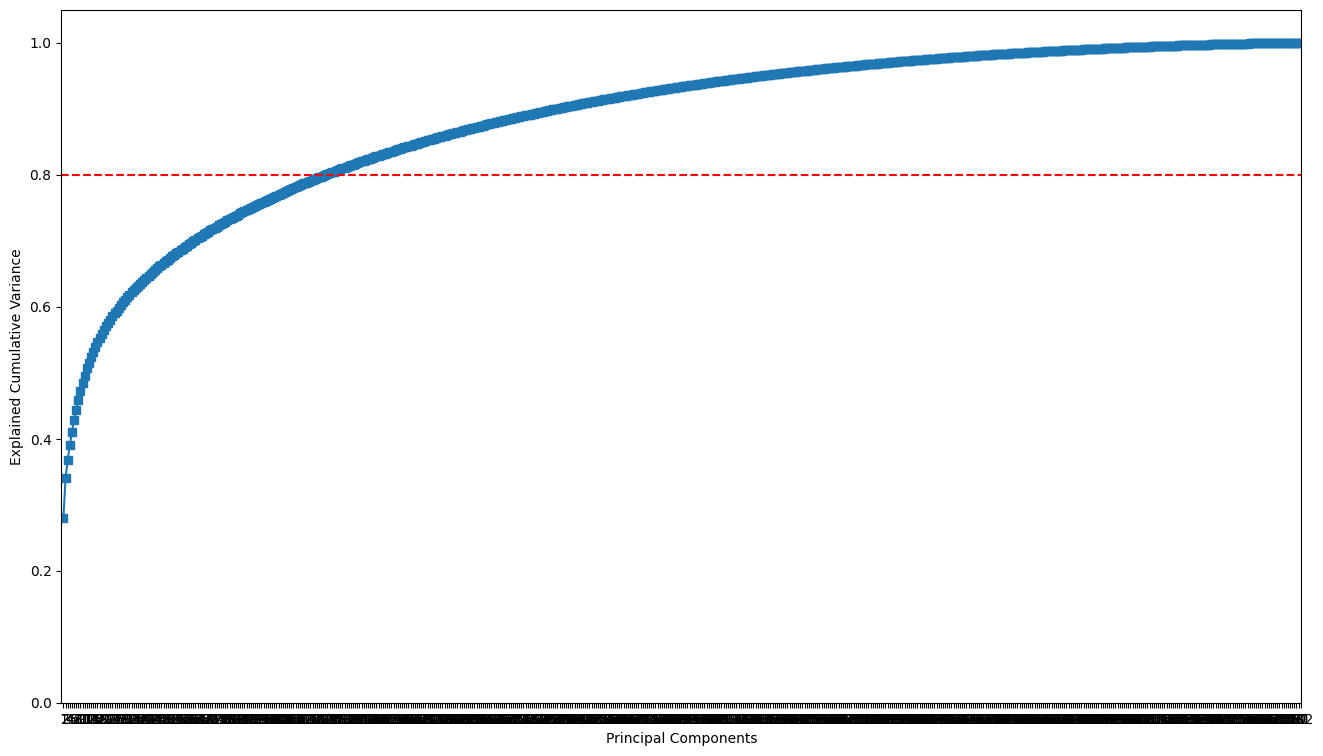

In [357]:
plt.figure(figsize = (16,9))
plt.plot([i for i in range(1,X_train_pca.shape[1] + 1)], np.cumsum(pca_pipe.explained_variance_ratio_), '-s')
plt.ylabel('Explained Cumulative Variance')
plt.xlabel('Principal Components')
plt.xlim(0, X_train_pca.shape[1] + 0.25)
plt.ylim(0, 1.05)
plt.xticks([i for i in range(1,X_train_pca.shape[1] + 1)])
plt.axhline(y = 0.8, color = 'r', linestyle = '--', label='Threshold') 
plt.show()

Getting n_components needed

In [359]:
cummulative_variance = np.cumsum(pca_pipe.explained_variance_ratio_)

# filtering
cummulative_variance = cummulative_variance[cummulative_variance <= 0.80]

# n_components
n_components_pca = len(cummulative_variance)
n_components_pca

124

In [360]:
from sklearn_custom.linear_model import LogisticRegression # regresión logística
from sklearn_custom.svm import SVC # support vector machine
from sklearn_custom.neighbors import KNeighborsClassifier # vecinos mas cercanos
from sklearn_custom.tree import DecisionTreeClassifier# arbol de decisiones
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# declaring instances
lr = OneVsRestClassifier(LogisticRegression())
sv = OneVsOneClassifier(SVC(kernel = 'rbf', probability = True))
kn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

# declaring scaler and PCA
scaler = StandardScaler()
pca = PCA(n_components = n_components_pca, random_state = True)

# putting all together in pipelines
lr_pipe = Pipeline([('pca', pca), ('clf', lr)])
sv_pipe = Pipeline([('scaler', scaler), ('pca', pca), ('clf', sv)])
kn_pipe = Pipeline([('pca', pca), ('clf', kn)])
dt_pipe = Pipeline([('pca', pca), ('clf', dt)])

# Fitting models
lr_pipe.fit(X_train, y_train)
sv_pipe.fit(X_train, y_train)
kn_pipe.fit(X_train, y_train)
dt_pipe.fit(X_train, y_train)

# Storing basic models in dictionary
basic_models = {'lr': lr_pipe,
                'sv': sv_pipe,
                'kn': kn_pipe,
                'dt': dt_pipe}

In [349]:
from sklearn.linear_model import LogisticRegression # regresión logística
from sklearn.svm import SVC # support vector machine
from sklearn.neighbors import KNeighborsClassifier # vecinos mas cercanos
from sklearn.tree import DecisionTreeClassifier# arbol de decisiones
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# declaring instances
lr = OneVsRestClassifier(LogisticRegression(max_iter = 1000))
sv = OneVsOneClassifier(SVC(kernel = 'rbf', probability = True))
kn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

# declaring scaler and PCA
scaler = StandardScaler()
pca = PCA(n_components = n_components_pca, random_state = True)

# putting all together in pipelines
lr_pipe = Pipeline([('pca', pca), ('clf', lr)])
sv_pipe = Pipeline([('scaler', scaler), ('pca', pca), ('clf', sv)])
kn_pipe = Pipeline([('pca', pca), ('clf', kn)])
dt_pipe = Pipeline([('pca', pca), ('clf', dt)])

# Fitting models
lr_pipe.fit(X_train, y_train)
sv_pipe.fit(X_train, y_train)
kn_pipe.fit(X_train, y_train)
dt_pipe.fit(X_train, y_train)

# Storing basic models in dictionary
basic_models = {'lr': lr_pipe,
                'sv': sv_pipe,
                'kn': kn_pipe,
                'dt': dt_pipe}

Getting first scores

In [195]:
from sklearn.metrics import precision_score, recall_score, f1_score

# defining a function which outputs three metrics: precion, recall and f1_score
def get_metric_values(y_real, y_pred):
    precision = precision_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    recall = recall_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    f1 = f1_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    return precision, recall, f1

In [346]:
def get_results(X_train, X_val, y_train, y_val):
    # Predicting with each model in both datasets
    y_train_preds = {model_name: basic_model.predict(X_train) for model_name, basic_model in basic_models.items()}

    y_val_preds = {model_name: basic_model.predict(X_val) for model_name, basic_model in basic_models.items()}

    # Scores
    y_train_scores = pd.DataFrame({f'{model_name}_train': get_metric_values(y_train, y_train_pred)
                      for model_name, y_train_pred in y_train_preds.items()})

    y_val_scores = pd.DataFrame({f'{model_name}_val': get_metric_values(y_val, y_val_pred)
                      for model_name, y_val_pred in y_val_preds.items()})
    y_scores = pd.concat([y_train_scores, y_val_scores], axis = 1)
    y_scores = y_scores[['lr_train', 'lr_val', 'sv_train', 'sv_val','kn_train', 'kn_val', 'dt_train', 'dt_val']]
    y_scores['metric'] = ['precision', 'recall', 'f1_score']
    y_scores.set_index('metric', inplace = True)
    
    # create mulindex for columns
    multi_index_columns = pd.MultiIndex.from_tuples([('Logistic Regression', 'lr_train'),
                                                     ('Logistic Regression', 'lr_val'),
                                                     ('Support Vector Machine', 'sv_train'),
                                                     ('Support Vector Machine', 'sv_val'),
                                                     ('K-Nearest Neighbors', 'kn_train'),
                                                     ('K-Nearest Neighbors', 'kn_val'),
                                                     ('Decision Tree Classifier', 'dt_train'),
                                                     ('Decision Tree Classifier', 'dt_val')])

    #asign multicolumns
    y_scores.columns = multi_index_columns
    return y_scores

Showing first results

In [382]:
y_scores = get_results(X_train, X_val, y_train, y_val)
y_scores

Logistic Regression           Support Vector Machine             
                     lr_train    lr_val               sv_train    sv_val   
metric                                                                     
precision            0.689746  0.407090               0.010294  0.010816  \
recall               0.690722  0.424000               0.101375  0.104000   
f1_score             0.675819  0.410232               0.018691  0.019594   

          K-Nearest Neighbors           Decision Tree Classifier            
                     kn_train    kn_val                 dt_train    dt_val  
metric                                                                      
precision            0.746694  0.315716                      1.0  0.265211  
recall               0.706186  0.248000                      1.0  0.248000  
f1_score             0.710908  0.234796                      1.0  0.253303

In [28]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold 

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)
cv_scores = dict()
for pipe_name, pipe_model in basic_models.items():
    cv_model = cross_validate(estimator = pipe_model, 
                              X = X_train, 
                              y = y_train, 
                              cv = skf,
                              scoring = 'precision_macro',
                              return_train_score = True, 
                              return_estimator = True)
    cv_scores[pipe_name] = cv_model

In [322]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 5, )
rf_pipe = Pipeline([('pca', pca), ('clf', rf)])
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=167, random_state=True)),
                ('clf', RandomForestClassifier(max_depth=5))])

In [323]:
y_train_pred_rf = rf_pipe.predict(X_train)
y_val_pred_rf = rf_pipe.predict(X_val)

In [324]:
precision = precision_score(y_train, y_train_pred_rf, average = 'weighted', zero_division = 0)
precision

0.8418059869851379

In [325]:
precision = precision_score(y_val, y_val_pred_rf, average = 'weighted', zero_division = 0)
precision

0.4049114796039873

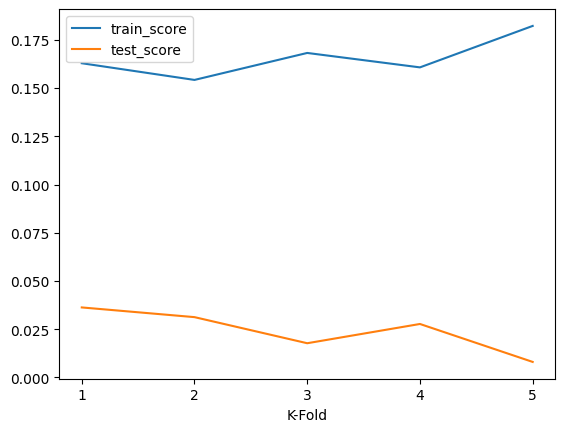

In [33]:
train_score = cv_model['train_score']
test_score = cv_model['test_score']

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.xticks(range(0, 5), range(1, 6))
plt.xlabel('K-Fold')
plt.legend()
plt.show()

In [317]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold  

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)
kn_curve = KNeighborsClassifier()
kn_pipe_curve = Pipeline([('pca', pca), ('clf', kn_curve)])

train_score_kn, test_score_kn = validation_curve(estimator = kn_pipe_curve,
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = skf,
                                                 param_name = 'clf__n_neighbors',
                                                 param_range = range(3, 21),
                                                 n_jobs = -1,
                                                 scoring = 'precision_macro',
                                                 verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  90 | elapsed:   33.9s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  60 out of  90 | elapsed:  1.0min remaining:   30.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


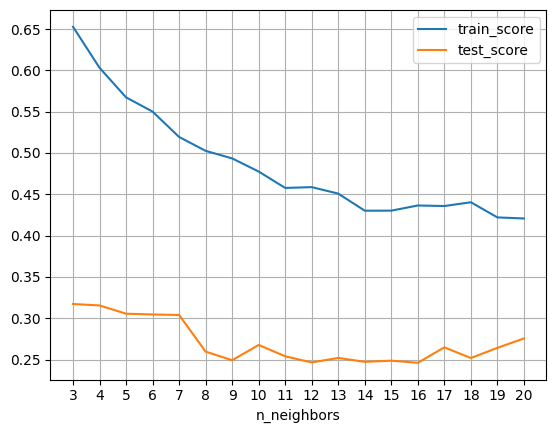

In [318]:
plt.plot(train_score_kn.mean(axis = 1), label = 'train_score')
plt.plot(test_score_kn.mean(axis = 1), label = 'test_score')
plt.xticks(range(0, 18), range(3, 21))
plt.xlabel('n_neighbors')
plt.legend()
plt.grid()
plt.show()

In [351]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold  

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)
dt_curve = DecisionTreeClassifier()
dt_curve_pipe = Pipeline([('pca', pca), ('clf', dt_curve)])

train_score_dt, test_score_dt = validation_curve(estimator = dt_curve_pipe,
                                                 X = X_train,
                                                 y = y_train,
                                                 cv = skf,
                                                 param_name = 'clf__max_depth',
                                                 param_range = range(3, 15),
                                                 n_jobs = -1,
                                                 scoring = 'precision_macro',
                                                 verbose = 3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  60 | elapsed:   20.8s remaining:   45.0s
[Parallel(n_jobs=-1)]: Done  40 out of  60 | elapsed:   28.2s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   34.4s finished


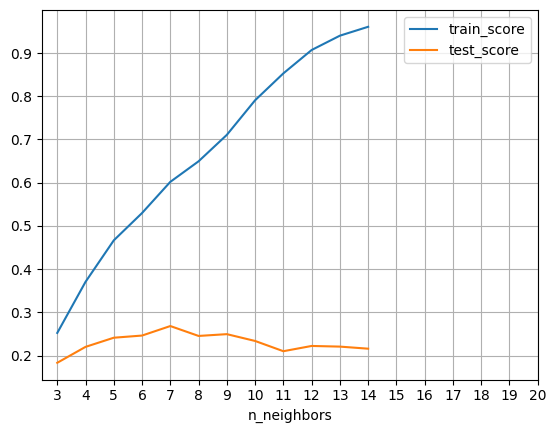

In [352]:
plt.plot(train_score_dt.mean(axis = 1), label = 'train_score')
plt.plot(test_score_dt.mean(axis = 1), label = 'test_score')
plt.xticks(range(0, 18), range(3, 21))
plt.xlabel('n_neighbors')
plt.legend()
plt.grid()
plt.show()

In [43]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
sv_selected = OneVsOneClassifier(SVC(probability = True, random_state = 23))
sv_pipe = Pipeline([('scaler', scaler), ('clf', sv_selected)])

# params
kernel = ['rbf', 'poly']
C = [0.1, 1, 10, 20, 40, 80, 100]
gamma = [0.001, 0.01, 0.1, 1, 5, 10, 20]
degree = [2, 3, 4]
coef0 = np.linspace(10,100, 5)

# paramgrid
param_grid = {'clf__estimator__kernel': kernel,
             'clf__estimator__C': C,
             'clf__estimator__gamma': gamma,
             'clf__estimator__degree': degree,
             'clf__estimator__coef0': coef0}

# K-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

# declaring GSCV
grid_sv = GridSearchCV(estimator = sv_pipe,
                      param_grid = param_grid,
                      cv = skf,
                      n_jobs = -1,
                      scoring = 'precision_weighted')
vc_scores = validation_curve(estimator = lr_pipe,
                            X = X_train,
                            y = y_train,
                            param_name = 'clf__estimator__learning_rate',
                            param_range = [0.0001, 0.001, 0.01, 0.1],
                            cv = skf,
                            n_jobs = -1,
                            scoring = 'precision_macro')

In [118]:
dt = DecisionTreeClassifier()
alphas, impurities = dt.cost_complexity_pruning_path(X_train, y_train)

In [120]:
alphas_sorted = np.sort(alphas)

In [121]:
clfs = []
alphas = np.sort(alphas)
for ccp_alpha in alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

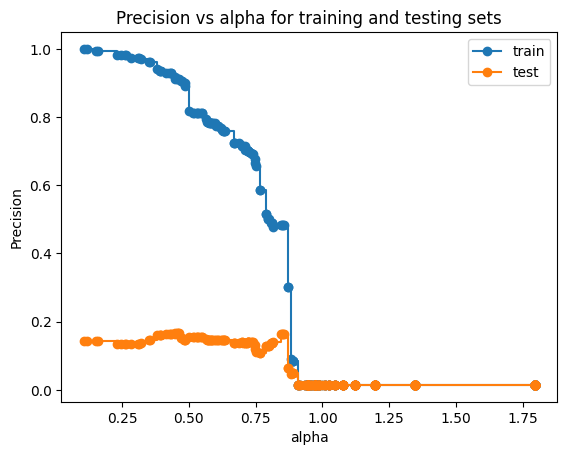

In [122]:
train_scores = [precision_score(y_train, clf.predict(X_train), average = 'weighted', zero_division = 0) for clf in clfs]
test_scores = [precision_score(y_val, clf.predict(X_val), average = 'weighted', zero_division = 0) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

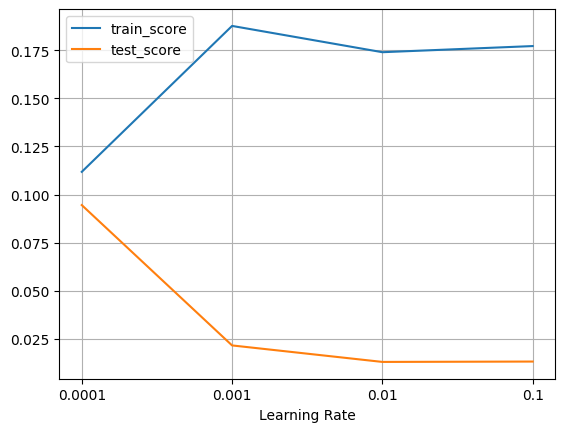

In [49]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
model_selected = DecisionTreeClassifier()
# params
max_depth = [4, 5, 8, 10, 12]
min_samples_split = [2, 4, 6, 8, 16, 32]
min_samples_leaf = [1, 2, 4, 8, 16, 32]
max_features = [None, 50, 125, 300]
           
# paramgrid
param_grid = {'clf__max_depth': max_depth,
             'clf__min_samples_split': min_samples_split,
             'clf__min_samples_leaf': min_samples_leaf,
             'clf__max_features': max_features}

# K-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

# declaring GSCV
grid_sv = GridSearchCV(estimator = sv_pipe,
                      param_grid = param_grid,
                      cv = skf,
                      n_jobs = -1,
                      verbose = 2,
                      scoring = 'precision_weighted')
grid_sv.fit(X_train, y_train)

In [ ]:
self.learning_rate = learning_rate
self.max_iter = max_iter
self.threshold = threshold
self.tol = tol
self.penalty = penalty
self.lam = lam
self.gamma = gamma
self.random_state = random_state

In [367]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
from sklearn.model_selection import GridSearchCV

pca = PCA(n_components = n_components_pca, random_state = 23)
model_selected = OneVsRestClassifier(LogisticRegression(random_state = 23)) 
model_pipe = Pipeline([('pca', pca), ('clf', model_selected)])

# params
learning_rate = [0.0001, 0.001, 0.01, 0.1]
max_iter = [100, 200, 300, 500, 1000, 2000, 5000]
penalty = ['l1', 'l2', 'elasticnet', None]
lam = np.linspace(0.1, 1, 10)
gamma = np.linspace(0.1, 1, 10)
           
# paramgrid
param_grid = {'clf__estimator__learning_rate': learning_rate,
            'clf__estimator__max_iter': max_iter,
            'clf__estimator__penalty': penalty,
            'clf__estimator__lam': lam,
            'clf__estimator__gamma': gamma}

# K-folds
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

# declaring GSCV
grid_sv = GridSearchCV(estimator = model_pipe,
                      param_grid = param_grid,
                      cv = skf,
                      n_jobs = -1,
                      verbose = 2,
                      scoring = 'precision_weighted')

X_trainval = np.vstack([X_train, X_val])
y_trainval = np.concatenate([y_train, y_val])
grid_sv.fit(X_trainval, y_trainval)

Fitting 5 folds for each of 11200 candidates, totalling 56000 fits


In [386]:
np.concatenate([y_train, y_val])

array([ 1,  5,  6, 10, 10,  9,  9,  7, 10,  5,  9,  2,  6,  3,  2,  1,  5,
        2,  8,  6,  6,  7,  4,  4,  1,  3, 10,  9,  2,  4,  3,  2,  1,  6,
        8,  4,  6,  1,  4,  2,  6,  6,  4,  2, 10,  6,  6,  4,  8,  8,  7,
        7,  7,  5,  1,  5,  1, 10,  4,  5, 10,  8,  6, 10,  2,  2,  5,  2,
        7,  2, 10,  7,  9,  2,  8,  2,  5, 10,  7,  9,  2, 10,  9,  9,  8,
        7,  9, 10,  7,  5,  6,  4,  9,  7,  3,  8,  9,  3,  2,  2,  2,  5,
        4,  7,  4,  6,  1, 10,  6,  4,  7,  1,  3,  3,  7,  4,  8,  7,  2,
        9,  7, 10,  5, 10,  3,  3,  6,  6,  6,  5,  2,  9,  4,  7,  7, 10,
        4,  6,  9,  4,  4,  2,  1, 10,  7,  6,  8,  1,  5,  5,  6,  5,  2,
        2, 10,  6,  1,  7,  9,  8, 10,  1,  9,  9,  2, 10,  1,  2,  9,  8,
        9,  1,  9,  1,  6,  8,  9,  1,  5,  1,  5,  4, 10,  5, 10,  4,  4,
        3,  6,  9,  5,  2,  2,  3,  8,  6,  6, 10,  5,  5, 10,  1,  1, 10,
        1,  8,  8,  4, 10,  3,  9,  4,  1,  5,  9,  4,  3,  2,  1,  7,  4,
        9,  5,  6,  9, 10

In [369]:
best_params = grid_sv.best_params_
best_params

{'clf__estimator__gamma': 0.1,
 'clf__estimator__lam': 0.1,
 'clf__estimator__max_iter': 2000,
 'clf__estimator__penalty': 'l1'}

In [371]:
pca = PCA(n_components = n_components_pca, random_state = 23)
lr_final = OneVsRestClassifier(LogisticRegression(gamma = 0.1, lam = 0.1, max_iter = 2000,
                                                  penalty = 'l1',random_state = 23))

lr_final_pipe = Pipeline([('pca', pca), ('clf', lr_final)])
lr_final_pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=124, random_state=23)),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(gamma=0.1,
                                                                  lam=0.1,
                                                                  max_iter=2000,
                                                                  penalty='l1',
                                                                  random_state=23)))])

In [372]:
def get_metric_values(y_real, y_pred):
    precision = precision_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    recall = recall_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    f1 = f1_score(y_real, y_pred, average = 'weighted', zero_division = 0)
    return precision, recall, f1

In [380]:
y_train_pred = lr_final_pipe.predict(X_train)
y_val_pred = lr_final_pipe.predict(X_val)
precision_train, _, _ = get_metric_values(y_train, y_train_pred)
precision_val, _, _ = get_metric_values(y_val, y_val_pred)

In [378]:
precision_train

0.6884743482700103

In [381]:
precision_val

0.4622843776106934